This notebook, written by E. Karlé, contains the code necessary to reproduce Figures 1 to 4 and Tables 1,2 from the article Dynamic Ranking with the BTL Model: A Nearest Neighbor based Rank Centrality Method. https://arxiv.org/abs/2109.13743

The notebook contain toy examples to give the user a feel of the methods and algorithms. To reproduce the figures of the paper, one has to comment/uncomment the corresponding set of parameters in the 'Parameters' cell in each section.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import copy

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [2]:
plt.rcParams.update({'font.size': 16})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Figure 1,2,3, Tables 1,2: different errors for DRC,MLE and Borda methods with running times

In [3]:
from drc import run_drc

grad
mle
graph
simu


In [4]:
# Parameters

# Toy example
list_N = [10,30] # Number of items
list_T = [10,20,30,40,50]  # Number of time points
B = 5 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#list_N = [100,400]
#list_T = np.arange(10,160,10)
#B = 60 # nb of Bootstrap repetitions

L = 5 # Number of Bernoulli for each observation in the BTL model
c_delta = 0.5 # constant for the choice of delta
c1 = 1 # comparison graphs are generated as Erdös-Renyi with parameter p(t) drawn from the uniform distribution on [c1/N;c2/N], c2  is fixed at (log n/n)

# Generation of true strengths via a Gaussian Process
cov_param = [1,1] # Variance parameter
mu_param = [0,0.1] # Mean parameter

# Estimation methods to use
mle_flag=True # MLE method
drc_flag=True # DRC method
borda_flag=True # Borda Count method

In [5]:
# Analysis 

results_DRC,results_borda,results_MLE = run_drc(list_N,list_T,L,B,c_delta,c1,cov_param,mu_param,drc_flag,mle_flag,borda_flag)

10


/Users/eglantine.karle/Docs/GitHub/DRC/drc.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  pi_RC[i,b,:] = sim.RC_dyn(t,Y,A,vec_delta[i],tol = 1e-12) # Estimation


20
30
40
50
10
20
30
40
50


In [6]:
MSE_DRC,error_DRC,l_inf_DRC,data_DRC,data_inf_DRC,time_DRC,sd_DRC = results_DRC
error_borda,time_borda,sd_borda = results_borda
MSE_MLE,error_MLE,l_inf_MLE,data_MLE,data_inf_MLE,time_MLE,sd_MLE = results_MLE

## Plots

## Evolution of the MSE within T

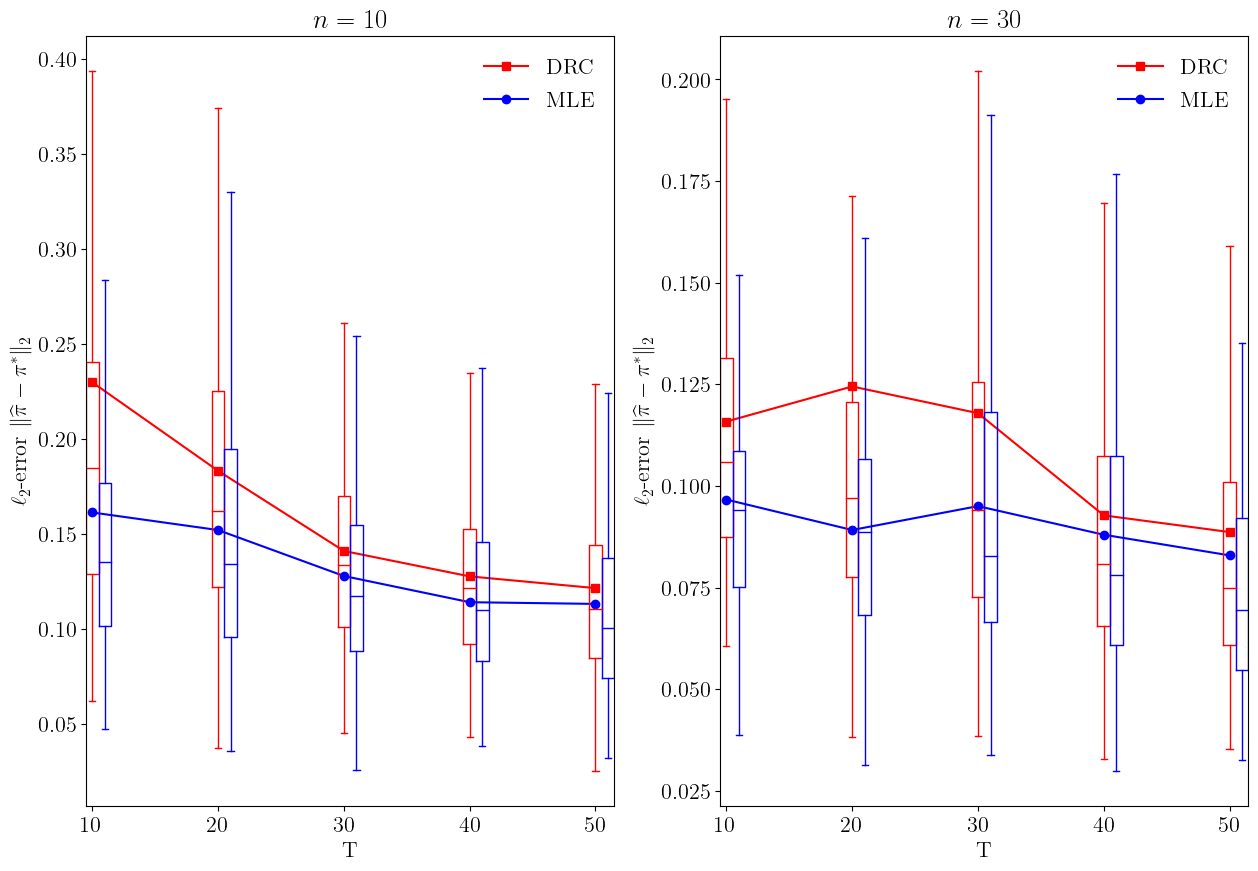

In [7]:
# Initialise the figure and axes.
fig, axes = plt.subplots(1,len(list_N), figsize=(15, 10))

for i in range(len(list_N)):
    axes[i].plot(list_T, MSE_DRC[i],marker='s', color="red", label="DRC")
    axes[i].plot(list_T, MSE_MLE[i],marker='o', color="blue", label="MLE")
    # Box plots
    box_DRC = axes[i].boxplot(data_DRC[i],showfliers=False,positions=list_T,widths = 1)
    box_MLE = axes[i].boxplot(data_MLE[i],showfliers=False,positions=[1+t for t in list_T],widths = 1)
    # change the color of its elements 
    for _, line_list in box_DRC.items(): 
        for line in line_list: 
            line.set_color('red') 
            
    for _, line_list in box_MLE.items(): 
        for line in line_list: 
            line.set_color('blue') 
    
    axes[i].set_xticks(list_T)
    axes[i].set_xlabel('T')
    axes[i].set_ylabel('$\ell_2$-error $\|\widehat{\pi} - \pi^*\|_2$')
    axes[i].set_title('$n = $ '+str(list_N[i]))

    # Add a legend, and position it on the lower right (with no box)
    axes[i].legend(loc="upper right", frameon=False)

fig.savefig('Results/MSE_DRC.png')

plt.show()

## Evolution of the error metric \\(D_w(\sigma)\\) within T

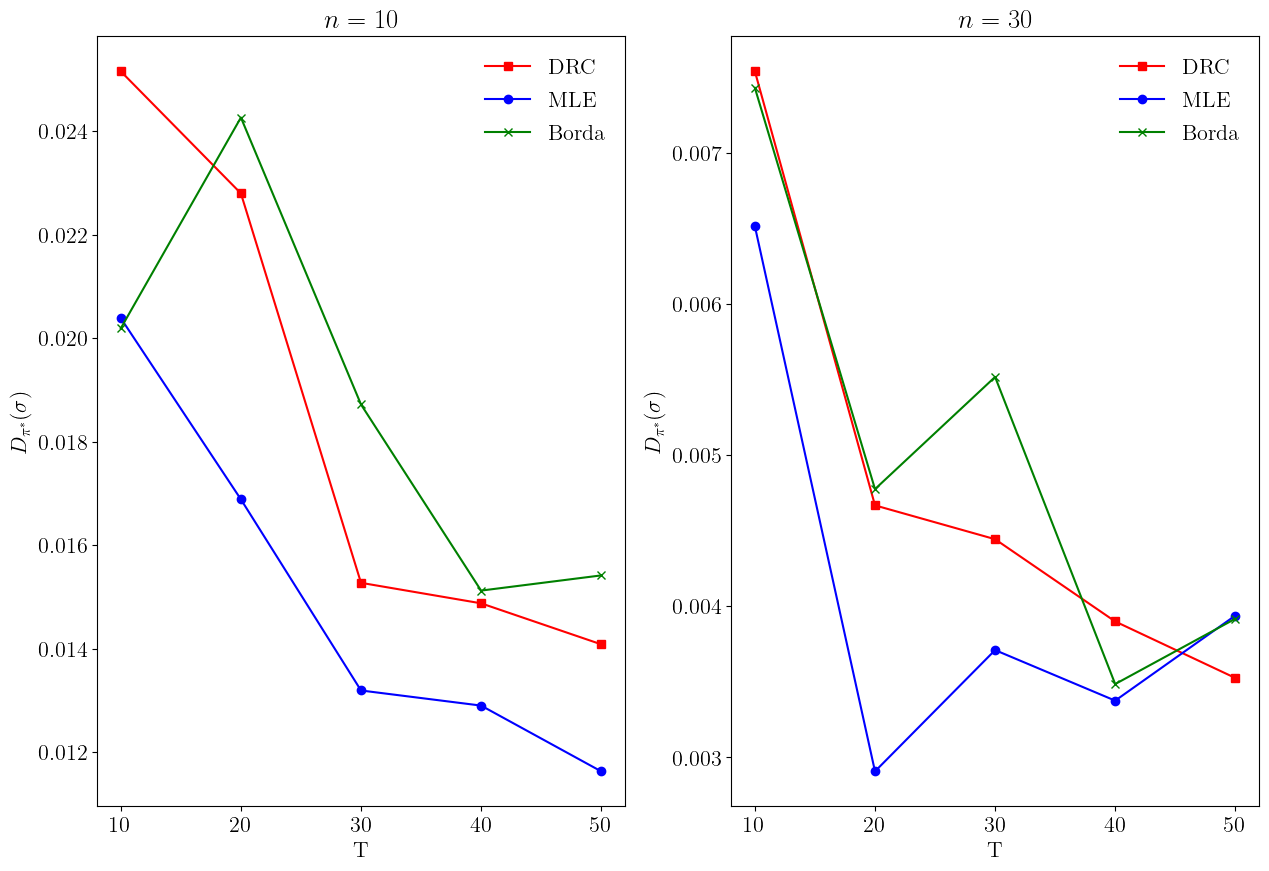

In [8]:
# Initialise the figure and axes.
fig, axes = plt.subplots(1,len(list_N), figsize=(15, 10))

for i in range(len(list_N)):
    axes[i].plot(list_T, error_DRC[i], marker='s',color="red", label="DRC")
    axes[i].plot(list_T, error_MLE[i], marker='o',color="blue", label="MLE")
    axes[i].plot(list_T, error_borda[i], marker='x',color="green", label="Borda")
    
    axes[i].set_xticks(list_T)
    axes[i].set_xlabel('T')
    axes[i].set_ylabel('$D_{\pi^*}(\sigma)$')
    axes[i].set_title('$n = $ '+str(list_N[i]))
    
    # Add a legend, and position it on the lower right (with no box)
    axes[i].legend(loc="upper right", frameon=False)

fig.savefig('Results/error_metric.png')

plt.show()

## Evolution of the l_inf error with T

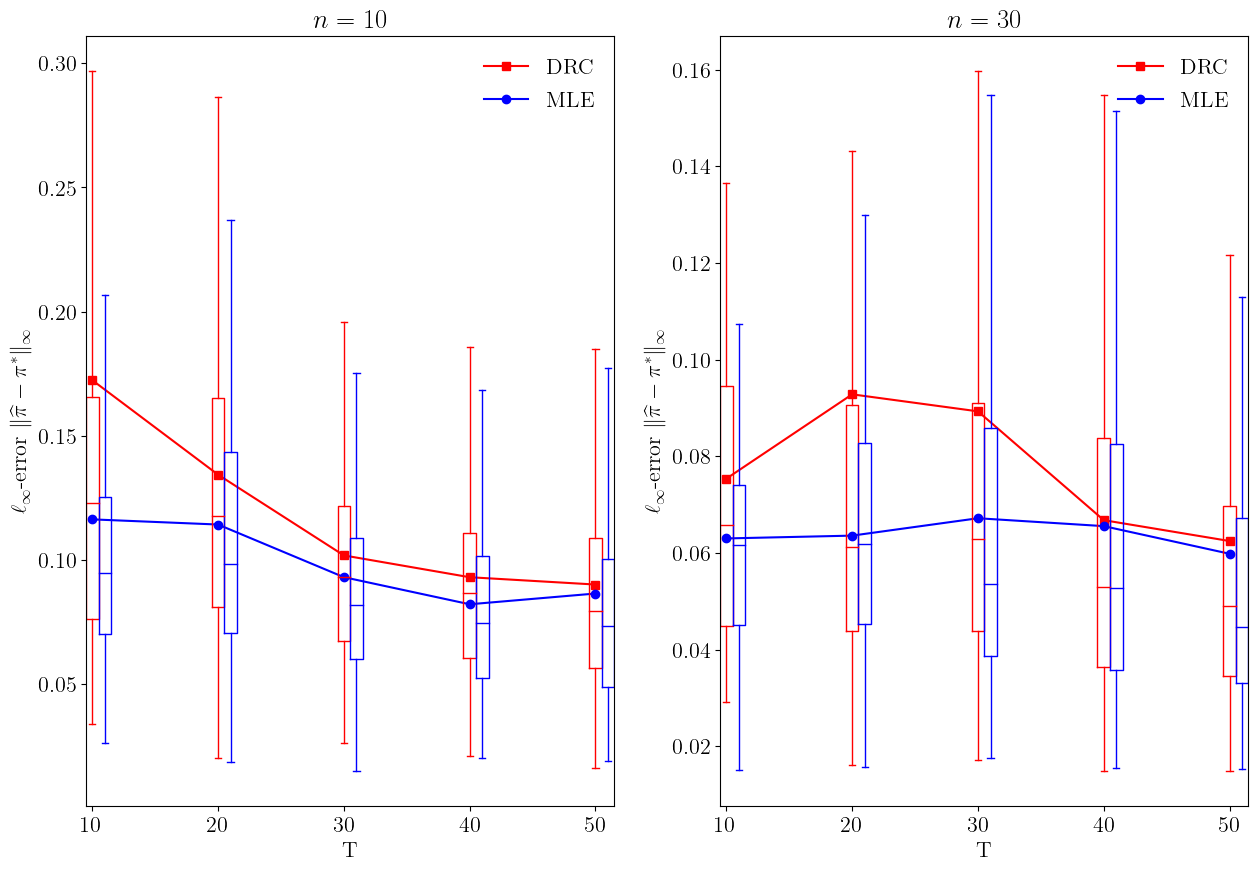

In [9]:
# Initialise the figure and axes.
fig, axes = plt.subplots(1,len(list_N), figsize=(15, 10))

for i in range(len(list_N)):
    axes[i].plot(list_T, l_inf_DRC[i],marker='s', color="red", label="DRC")
    axes[i].plot(list_T, l_inf_MLE[i],marker='o', color="blue", label="MLE")
    
    box_DRC = axes[i].boxplot(data_inf_DRC[i],showfliers=False,positions=list_T,widths = 1)
    box_MLE = axes[i].boxplot(data_inf_MLE[i],showfliers=False,positions=[1+t for t in list_T],widths = 1)
    # change the color of its elements 
    for _, line_list in box_DRC.items(): 
        for line in line_list: 
            line.set_color('red') 
            
    for _, line_list in box_MLE.items(): 
        for line in line_list: 
            line.set_color('blue') 
    
    axes[i].set_xticks(list_T)
    axes[i].set_xlabel('T')
    axes[i].set_ylabel('$\ell_{\infty}$-error $\|\widehat{\pi} - \pi^*\|_\infty$')
    axes[i].set_title('$n=$ '+str(list_N[i]))
            
    # Add a legend, and position it on the lower right (with no box)
    axes[i].legend(loc="upper right", frameon=False)

fig.savefig('Results/linf_DRC.png')

plt.show()

## Running time

In [10]:
from tabulate import tabulate
import math

In [16]:
# Create header
header = copy.deepcopy(list_T)
header.insert(0,'T')

for i in range(len(list_N)):
    # Data for one value of N
    t_DRC = time_DRC[i]
    t_MLE = time_MLE[i]
    s_DRC = sd_DRC[i]
    s_MLE = sd_MLE[i]
    
    # Keep 2 decimals
    trun_DRC = [math.trunc(val*100)/100 for val in t_DRC] # Keep 2 decimals
    trun_MLE = [math.trunc(val*100)/100 for val in t_MLE]
    trun_sd_DRC = [math.trunc(val*100)/100 for val in s_DRC] # Keep 2 decimals
    trun_sd_MLE = [math.trunc(val*100)/100 for val in s_MLE]
    
    # Creation of the table rows
    row_DRC = [str(trun_DRC[j])+'\u00B1'+str(trun_sd_DRC[j]) for j in range(len(list_T))]
    row_DRC.insert(0,'DRC')
    
    row_MLE = [str(trun_MLE[j])+'\u00B1'+str(trun_sd_MLE[j]) for j in range(len(list_T))]
    row_MLE.insert(0,'MLE')

    print('Running time for $n = $'+str(list_N[i]))
    print(tabulate([row_DRC,row_MLE],headers=header))
    

Running time for $n = $10
T    10         20         30         40         50
---  ---------  ---------  ---------  ---------  ---------
DRC  0.0±0.0    0.01±0.0   0.02±0.0   0.04±0.0   0.06±0.0
MLE  0.14±0.12  0.32±0.17  0.28±0.05  0.39±0.14  0.64±0.32
Running time for $n = $30
T    10         20         30        40        50
---  ---------  ---------  --------  --------  ---------
DRC  0.03±0.0   0.07±0.0   0.11±0.0  0.17±0.0  0.25±0.02
MLE  0.22±0.13  0.37±0.02  1.0±0.18  1.55±1.0  1.61±0.23


# Figure 4 : performance against $\delta$

In [4]:
from performance import perf_delta

In [5]:
# Parameters

# Toy example
N = 30 # Number of items
T = 50 # Number of time points
B = 10 # Number of Monte Carlo runs
list_delta = [1,10,50] # List of parameters delta

## Parameters for Figure 4
#T = 100
#B = 20 # nb of Bootstrap repetitions
## Parameters delta to test
#list_delta = [10*i for i in range(1,11)]
#list_delta.insert(0,1)
#list_delta.insert(0,1/2)

L = 5 # Number of Bernoulli observations in the BTL model
c1 = 1 # comparison graphs are generated as Erdös-Renyi with parameter p(t) drawn from the uniform distribution on [c1/N;c2/N], c2  is fixed at (log n/n)

# Generation of true strengths via a Gaussian Process
cov_param = [1,1] # Variance parameter
mu_param = [0,0.1] # Mean parameter

In [6]:
# Analysis on toy example
perf = perf_delta(N,T,list_delta,L,B,c1,cov_param,mu_param)

## Analysis with the parameters of the paper
#perf_N100 = perf_delta(100,T,list_delta,L,N,c1,cov_param,mu_param) # Performance for N = 100
#perf_N400 = perf_delta(400,T,list_delta,L,N,c1,cov_param,mu_param) # Performance for N = 400

delta=1
0


/Users/eglantine.karle/Docs/GitHub/DRC/performance.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  pi_RC[i,b,:] = sim.RC_dyn(t,Y,A,vec_delta[i],tol = 1e-12)


1
2
3
4
5
6
7
8
9
delta=10
0
1
2
3
4
5
6
7
8
9
delta=50
0
1
2
3
4
5
6
7
8
9


No handles with labels found to put in legend.


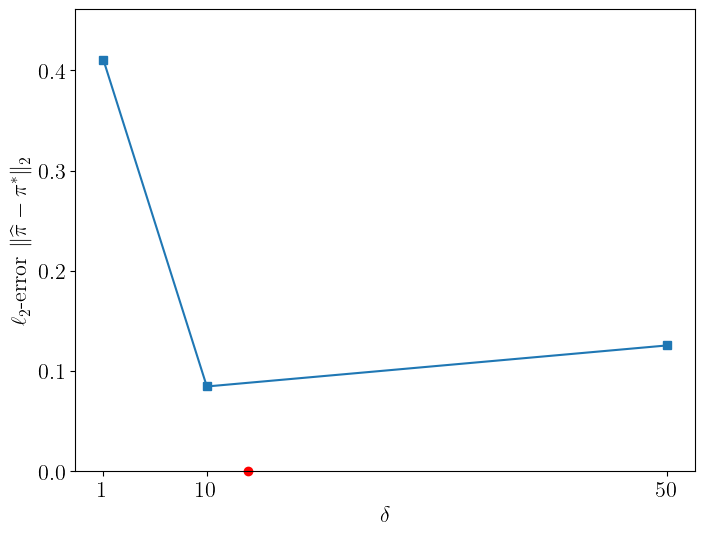

In [13]:
# Initialise the figure and axes.
fig, ax0 = plt.subplots(1, figsize=(8, 6))

ax0.plot(list_delta, perf, marker='s')
ax0.plot(T**(2/3),0,marker = 'o',color='red',clip_on=False) # Value of parameter derived theoretically

ax0.set_xticks(list_delta)
ax0.set_ylim(0,max(perf)+0.05)
ax0.set_xlabel('$\delta$')
ax0.set_ylabel('$\ell_2$-error $\|\widehat{\pi} - \pi^*\|_2$')

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)

fig.savefig('Results/perf_delta.png')

plt.show()